In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm


# Load Boston Housing dataset from Excel file
data = pd.read_csv('housing.csv')
print(data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

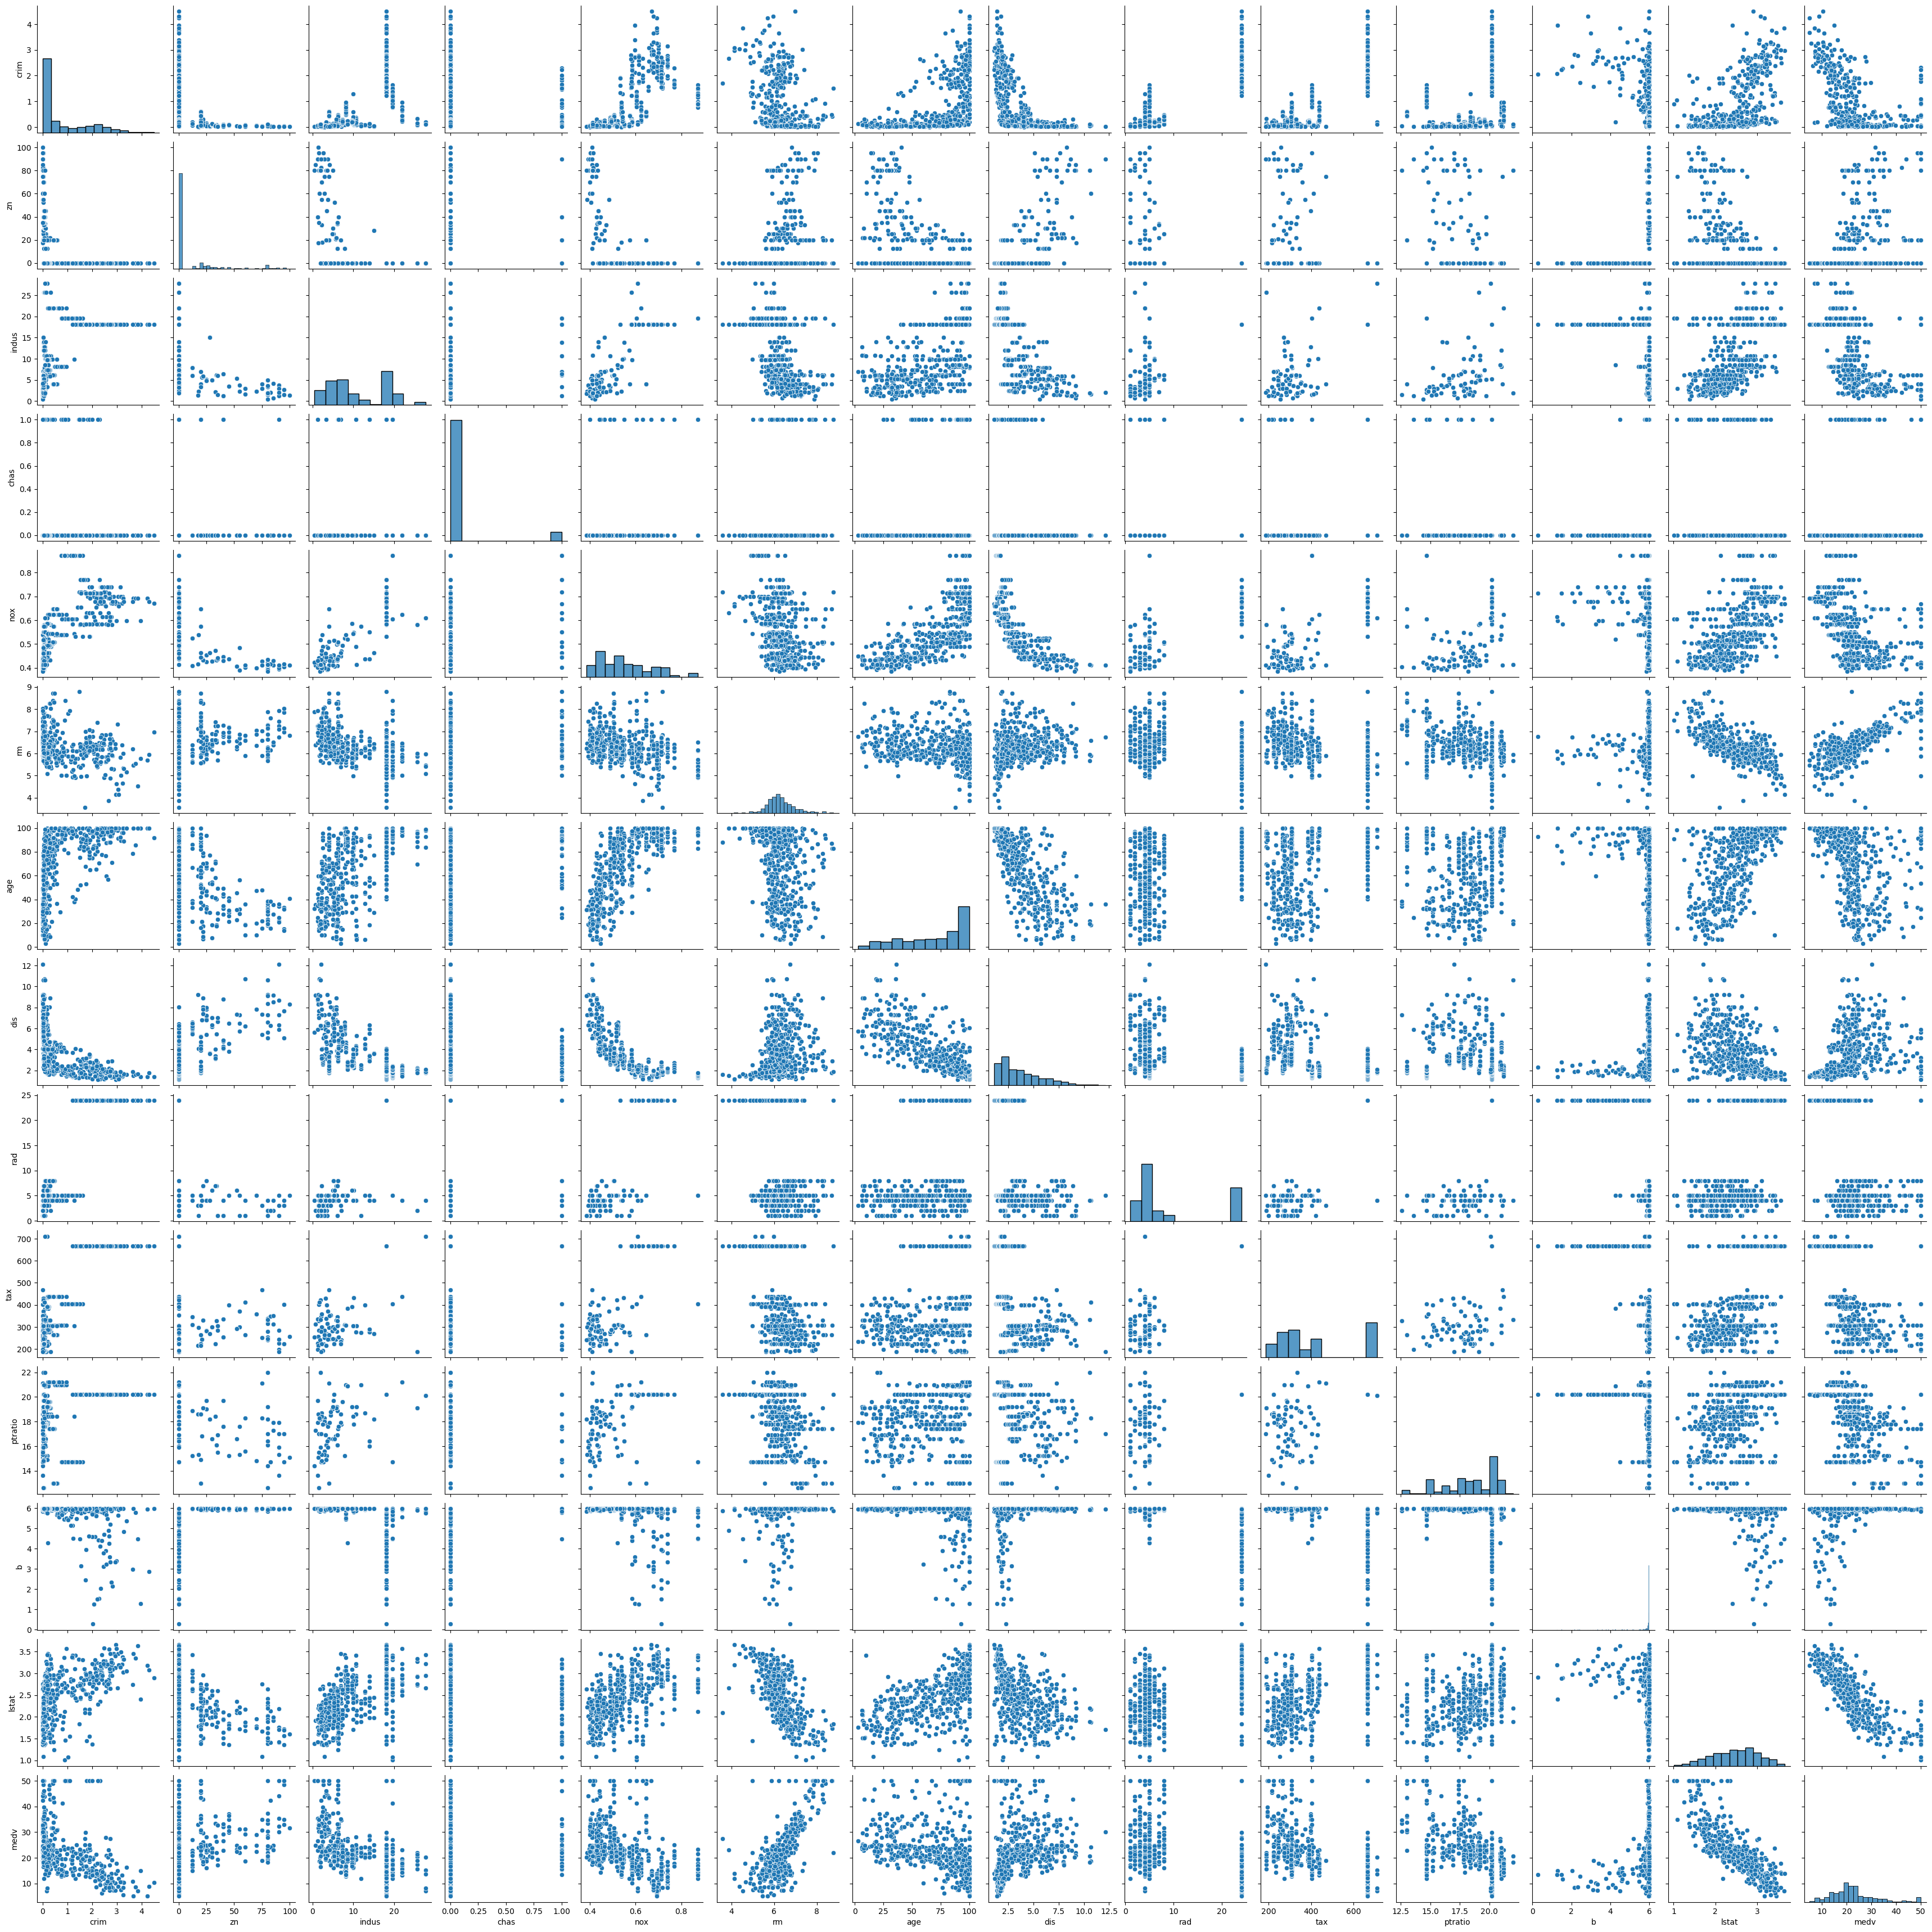

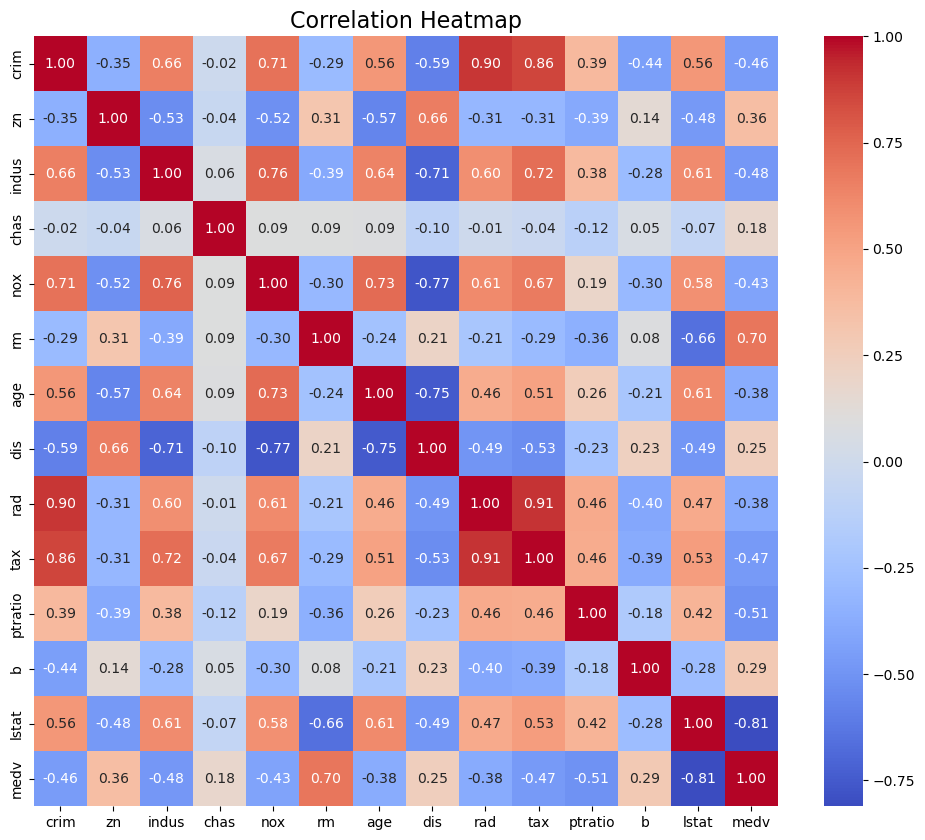

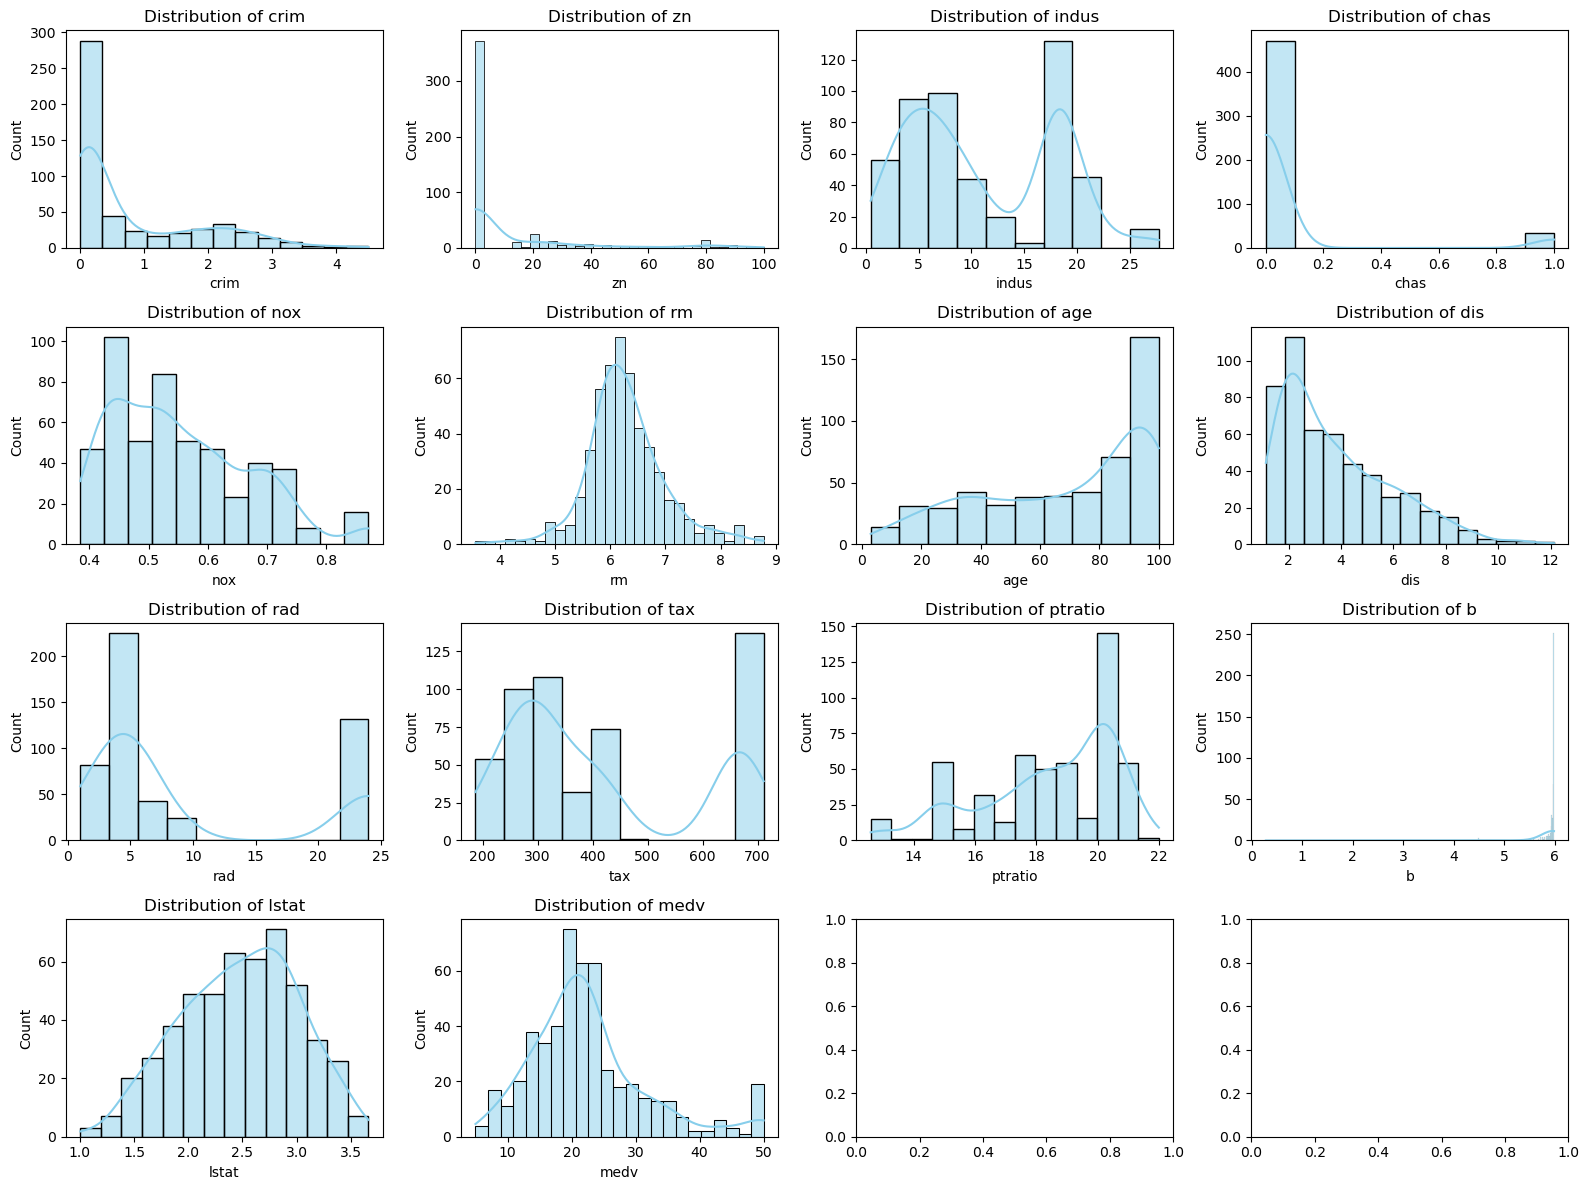

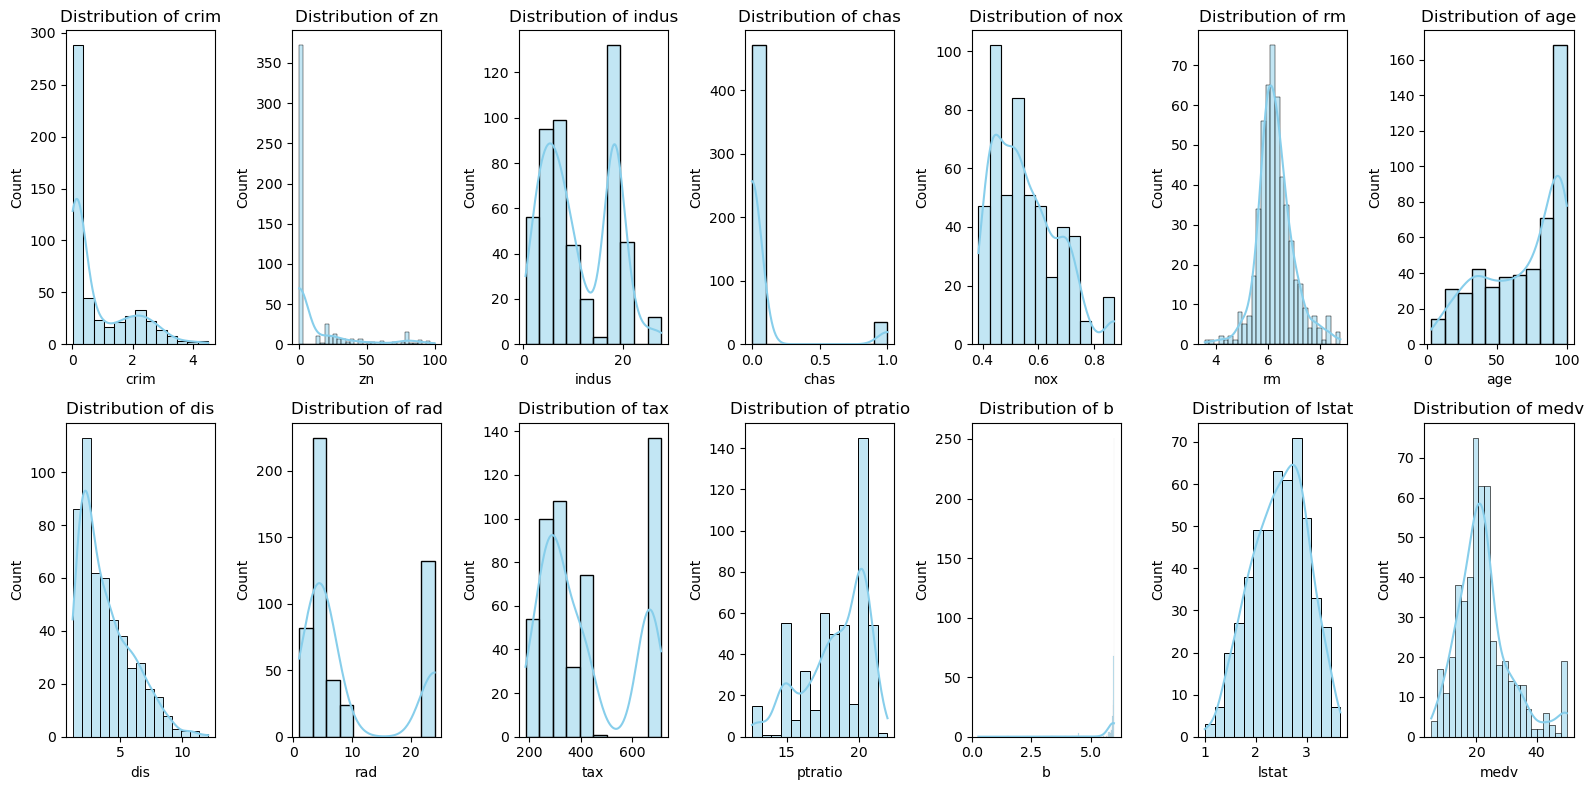

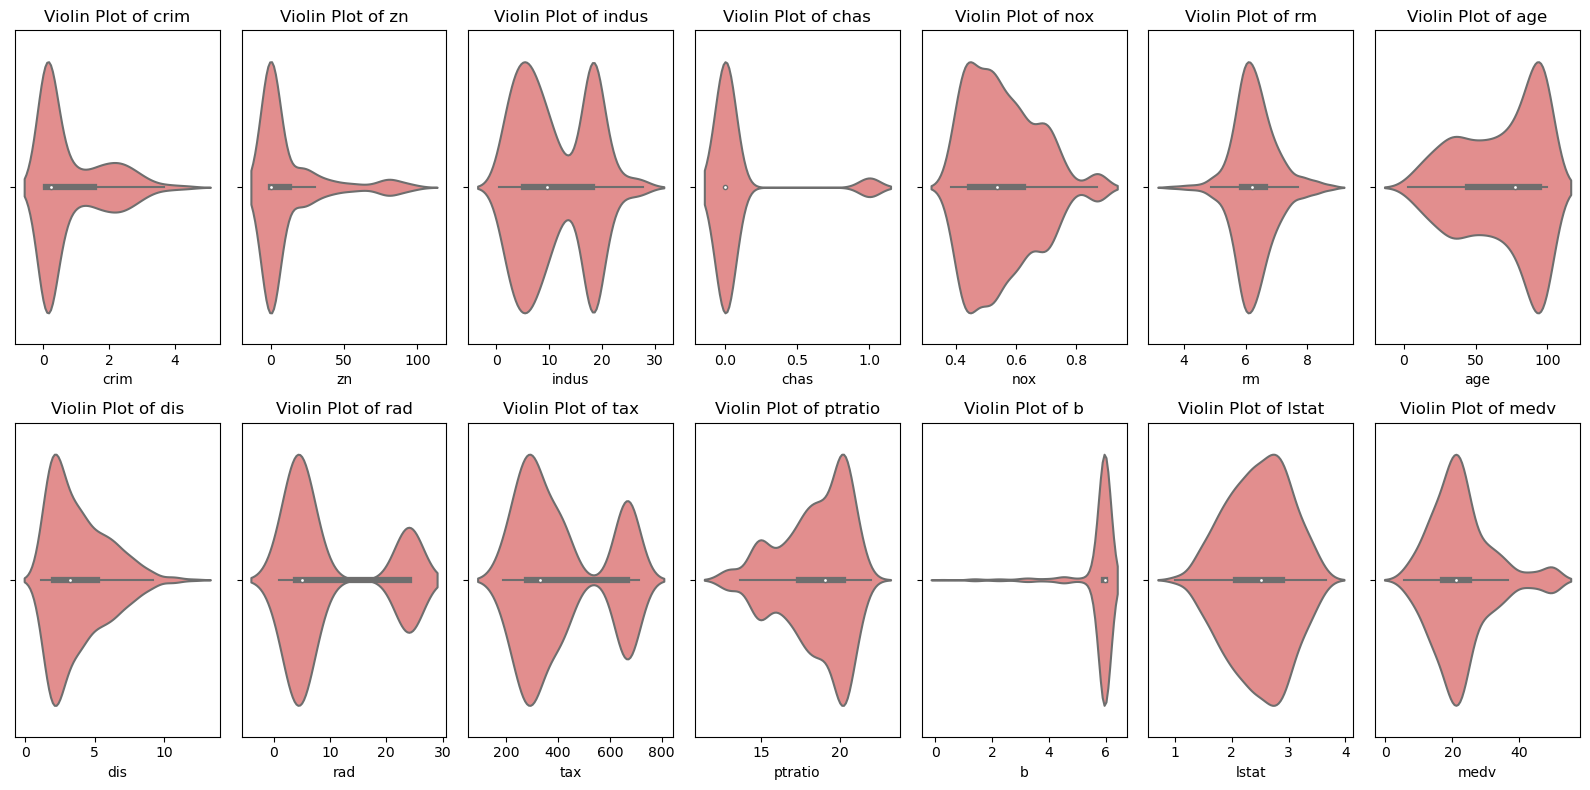

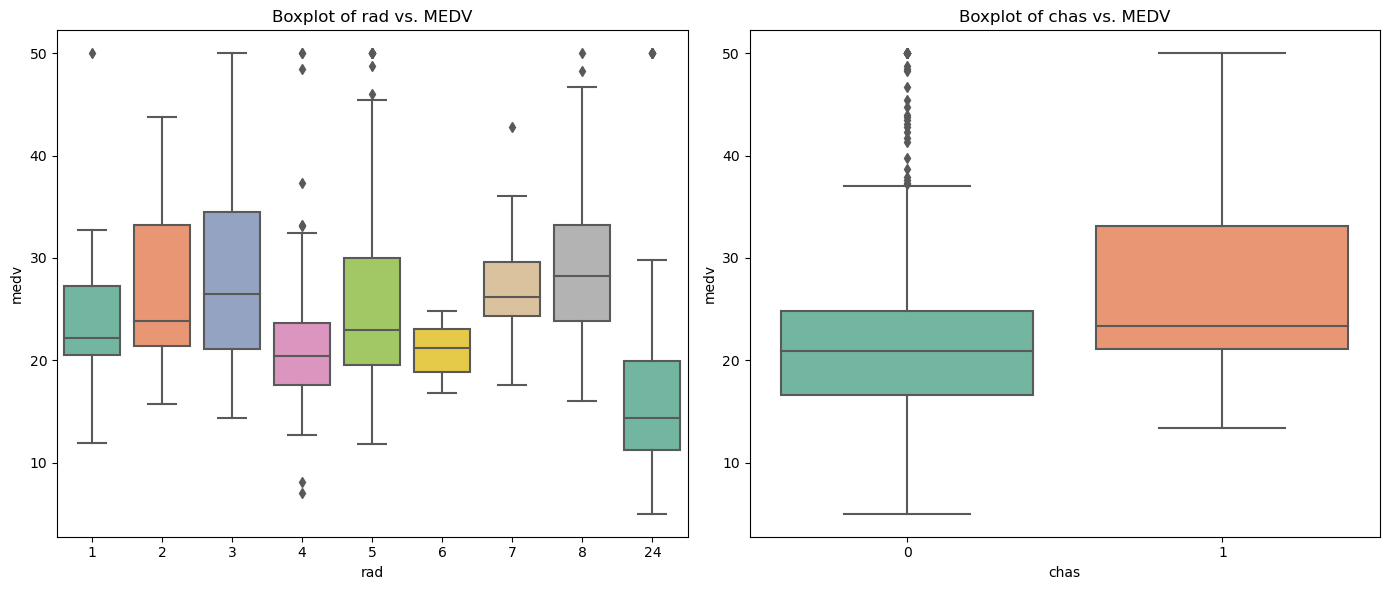

One-Sample T-Test:
T-statistic: -15.101009947720367
P-value: 8.670037887767892e-43

Two-Sample T-Test:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05

ANOVA:
F-statistic: 18.41604781216924
P-value: 3.1256493316010175e-24


In [2]:
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Handle outliers using Z-score
z_scores = zscore(data)
outliers = (np.abs(z_scores) > 3).all(axis=1)
data_no_outliers = data[~outliers]
print(data_no_outliers.head())

# Log transformation of skewed variables
skewed_vars = ['crim', 'b', 'lstat']
data_no_outliers[skewed_vars] = np.log1p(data_no_outliers[skewed_vars])
print(data_no_outliers.head())

# Select relevant features and the target variable
selected_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
data_selected = data_no_outliers[selected_features]
data_selected.head()

# Pairplot for selected features
sns.pairplot(data_selected)
plt.show()

# Correlation heatmap with adjusted size
plt.figure(figsize=(12, 10))  # Set the desired size

correlation_matrix = data_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.savefig('Correlation.png')
plt.show()


# Distribution plots for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
for i, col in enumerate(selected_features):
    sns.histplot(data_selected[col], kde=True, ax=axes[i // 4, i % 4], color='skyblue')
    axes[i // 4, i % 4].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Distribution plots for each column
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(16, 8))
for i, col in enumerate(selected_features[:14]):  # Select the first 14 columns
    sns.histplot(data_selected[col], kde=True, ax=axes[i // 7, i % 7], color='skyblue')
    axes[i // 7, i % 7].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('Distribution.png')
plt.show()


# Violin plots for selected features
# Violin plots for selected features
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(16, 8))
for i, col in enumerate(selected_features[:14]):  # Select the first 14 columns
    sns.violinplot(x=data_selected[col], ax=axes[i // 7, i % 7], color='lightcoral')
    axes[i // 7, i % 7].set_title(f'Violin Plot of {col}')
plt.tight_layout()
plt.savefig("Violin plots.png")
plt.show()


# Boxplots for additional exploration with different variables
# Boxplots for additional exploration with different variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

categorical_features = ['rad', 'chas']

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='medv', data=data_selected, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {feature} vs. MEDV')

plt.tight_layout()
plt.savefig("Boxplots.png")
plt.show()


import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind, f_oneway

# Extract a sample column for testing (replace 'CRIM' with the desired column)
sample_column = data_selected['crim']

# One-Sample T-Test (testing if mean of 'sample_column' is significantly different from a hypothesized value)
hypothesized_mean = 1.5
t_stat, p_value = ttest_1samp(sample_column, hypothesized_mean)
print(f"One-Sample T-Test:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

# Two-Sample T-Test (testing if means of two samples are significantly different)
group1 = data_selected[data_selected['chas'] == 1]['medv']
group2 = data_selected[data_selected['chas'] == 0]['medv']
t_stat, p_value = ttest_ind(group1, group2)
print(f"Two-Sample T-Test:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

# ANOVA (testing if means of more than two samples are significantly different)
categories = data_selected['rad'].unique()
anova_data = [data_selected[data_selected['rad'] == cat]['medv'] for cat in categories]
f_stat, p_value = f_oneway(*anova_data)
print(f"ANOVA:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


P-value for the impact of crim on medv: nan
P-value for the impact of rad on medv: nan
Mean Squared Error: 61.46914303581347
R-squared: 0.16178955473456091


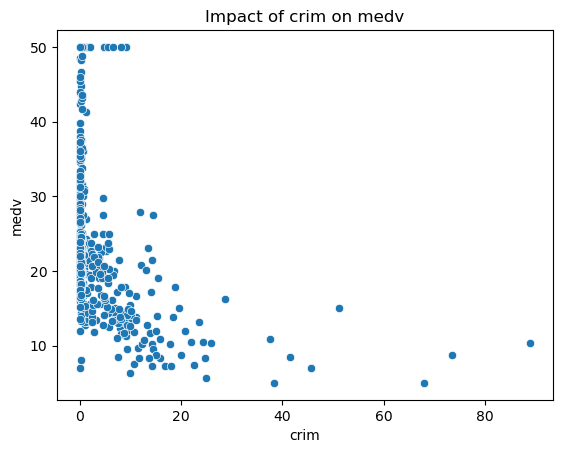

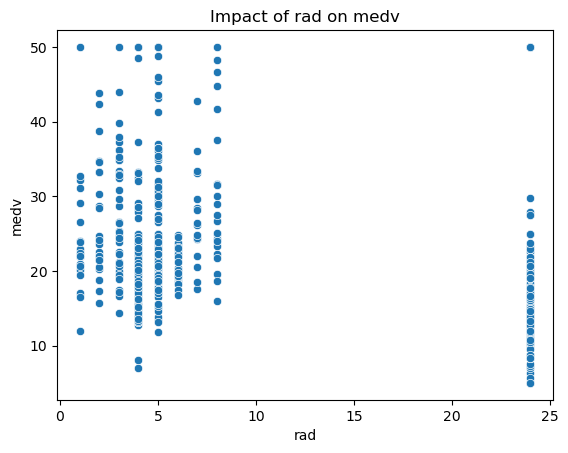

In [3]:
# Select relevant features for the hypothesis
selected_features = ['crim', 'rad', 'medv']  # 'medv' is the target variable

# Create a subset with selected features
subset_data = data[selected_features]

# Statistical tests
# Perform a t-test to assess the impact of 'crim' on 'medv'
_, p_value_crim = ttest_ind(subset_data[subset_data['rad'] == 0]['medv'], 
                             subset_data[subset_data['rad'] == 1]['medv'])

# Perform a t-test to assess the impact of 'rad' on 'medv'
_, p_value_rad = ttest_ind(subset_data[subset_data['crim'] == 0]['medv'], 
                            subset_data[subset_data['crim'] == 1]['medv'])

# Output the p-values
print(f'P-value for the impact of crim on medv: {p_value_crim}')
print(f'P-value for the impact of rad on medv: {p_value_rad}')

# Modeling
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(subset_data[['crim', 'rad']], 
                                                    subset_data['medv'], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output model evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the relationship between 'crim' and 'medv'
sns.scatterplot(x='crim', y='medv', data=subset_data)
plt.title('Impact of crim on medv')
plt.savefig('Hypothesis11.png')
plt.show()

# Visualize the relationship between 'rad' and 'medv'
sns.scatterplot(x='rad', y='medv', data=subset_data)
plt.title('Impact of rad on medv')
plt.savefig('Hypothesis12.png')
plt.show()

In [4]:
# Selecting relevant features for the hypothesis
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

# Creating the design matrix
X = data[features]
y = data['medv']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the multiple linear regression model
X_train = sm.add_constant(X_train)  # Add a constant term to the features
model = sm.OLS(y_train, X_train).fit()

# Displaying the summary statistics
print(model.summary())

# Predicting on the test set
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Displaying evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

# Visualizing the interaction effects
# You can use scatterplots, pairplots, or other relevant plots
sns.pairplot(df, x_vars=features, y_vars='medv', kind='scatter')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.348e+30
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:20:59   Log-Likelihood:                 12146.
No. Observations:                 404   AIC:                        -2.426e+04
Df Residuals:                     389   BIC:                        -2.420e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.997e-14   2.69e-14     -1.487      0.1

NameError: name 'df' is not defined

Mean Squared Error (Polynomial Regression): 14.18355816569268
R-squared (Polynomial Regression): 0.8065890295788442


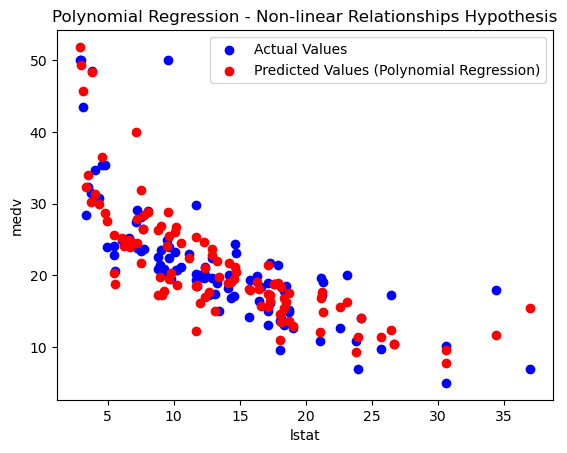

P-values for each coefficient:
crim       5.383675e-03
zn         3.932219e-02
indus      6.301864e-01
chas       5.848730e-03
nox        1.649566e-01
rm         1.040527e-54
age        4.617378e-01
dis        4.168277e-06
rad        6.440155e-02
tax        7.423019e-02
ptratio    1.579678e-04
b          2.031050e-08
lstat      1.135642e-13
dtype: float64


In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is your dataset, and 'medv' is the target variable
# Update column names as needed

# Selecting relevant features for the hypothesis
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

# Creating the design matrix
X = data[features].drop('medv', axis=1)  # Exclude 'medv' from features
y = data['medv']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Polynomial Regression
degree = 2  # Choose the degree of the polynomial
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predicting on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluating the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r_squared_poly = r2_score(y_test, y_pred_poly)

# Displaying evaluation metrics
print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')
print(f'R-squared (Polynomial Regression): {r_squared_poly}')

# Visualizing the Results
plt.scatter(X_test['lstat'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['lstat'], y_pred_poly, color='red', label='Predicted Values (Polynomial Regression)')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.legend()
plt.title('Polynomial Regression - Non-linear Relationships Hypothesis')
plt.show()


#Statistical Significance
model = sm.OLS(y_train, X_train).fit()

# Get p-values
p_values = model.pvalues

# Display p-values
print("P-values for each coefficient:")
print(p_values)

In [7]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Original data
X = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = data['medv']

# Polynomial regression with LASSO regularization
degree = 3  # Choose an appropriate degree
alpha = 0.001  # Adjust the regularization strength

# Create a pipeline with PolynomialFeatures and Lasso regression
model_lasso = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))

# Fit the model
model_lasso.fit(X, y)

# Evaluate the model
y_pred_lasso = model_lasso.predict(X)

# Assess model performance (you can use appropriate metrics)
mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_lasso = r2_score(y, y_pred_lasso)

# Print the results
print(f"Mean Squared Error (LASSO): {mse_lasso}")
print(f"R-squared (LASSO): {r2_lasso}")


Mean Squared Error (LASSO): 3.489210043327582
R-squared (LASSO): 0.9586682256789768


C:\Users\juvva\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.077e+02, tolerance: 4.272e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'X' is the feature matrix and 'y' is the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength) parameter
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

# Elastic Net Regression
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust both alpha and l1_ratio parameters
elasticnet_model.fit(X_train, y_train)

# Predicting on the test set
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
elasticnet_pred = elasticnet_model.predict(X_test)

# Evaluating the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    print(f"{model_name} Mean Squared Error: {mse}")
    print(f"{model_name} R-squared: {r_squared}")
    return mse, r_squared

ridge_mse, ridge_r_squared = evaluate_model(y_test, ridge_pred, "Ridge")
lasso_mse, lasso_r_squared = evaluate_model(y_test, lasso_pred, "Lasso")
elasticnet_mse, elasticnet_r_squared = evaluate_model(y_test, elasticnet_pred, "Elastic Net")

# Plotting coefficients for interpretation
def plot_coefficients(model, feature_names, model_name):
    coefficients = model.coef_
    num_features = len(coefficients)
    plt.figure(figsize=(10, 6))
    plt.bar(range(num_features), coefficients)
    plt.title(f"{model_name} Coefficients")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Values")
    plt.xticks(range(num_features), feature_names)  # Assuming features are labeled with their names
    plt.show()

# Assuming X_train.columns is a pandas DataFrame with column names
plot_coefficients(ridge_model, X_train.columns, "Ridge")
plot_coefficients(lasso_model, X_train.columns, "Lasso")
plot_coefficients(elasticnet_model, X_train.columns, "Elastic Net")

# Plotting predicted vs actual values with separate colors
plt.figure(figsize=(15, 5))

# Ridge Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, ridge_pred, color='blue', label='Actual')
plt.scatter(ridge_pred, ridge_pred, color='red', label='Predicted')
plt.title('Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Lasso Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, lasso_pred, color='blue', label='Actual')
plt.scatter(lasso_pred, lasso_pred, color='red', label='Predicted')
plt.title('Lasso Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Elastic Net Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, elasticnet_pred, color='blue', label='Actual')
plt.scatter(elasticnet_pred, elasticnet_pred, color='red', label='Predicted')
plt.title('Elastic Net Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

